<a href="https://colab.research.google.com/github/raqueeb/mltraining/blob/master/Python/titanic_project_7_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# টাইটানিক প্রজেক্ট

১. ডেটা লোড করা:
pandas লাইব্রেরি ব্যবহার করে ট্রেনিং ও টেস্ট ডেটাসেট লোড করা।

২. ডিসিশন ট্রি মডেল তৈরি:
sklearn.tree.DecisionTreeClassifier ব্যবহার করে ডিসিশন ট্রি মডেল ট্রেন করা।

৩. প্রেডিকশন করা:
model.predict() দিয়ে টেস্ট ডেটাসেটের জন্য প্রেডিকশন নেওয়া।

৪. ফলাফলকে ডেটাফ্রেমে সংরক্ষণ:
pandas.DataFrame ব্যবহার করে PassengerId, Name, ও Survived ফলাফল রাখা।

In [1]:
# দরকারি লাইব্রেরি ইমপোর্ট করি
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# কীভাবে কাজ করছে?

1. ডেটা লোড করা হয়েছে pandas দিয়ে
2. Categorical ভ্যালুগুলো (যেমন, "Sex", "Embarked")
3. সংখ্যায় কনভার্ট করা হয়েছে
4. ফাঁকা (NaN) ভ্যালুগুলো গড় দিয়ে পূরণ করা হয়েছে
5. Decision Tree মডেল প্রশিক্ষণ ও প্রেডিকশন করা হয়েছে
6. প্রেডিকশন রেজাল্ট একটা নতুন ডেটাফ্রেমে সংরক্ষণ করা হয়েছে





In [2]:
# ১. ট্রেন ও টেস্ট ডেটা লোড করি
train = pd.read_csv('https://raw.githubusercontent.com/raqueeb/mltraining/master/ML-workbook/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/raqueeb/mltraining/master/ML-workbook/test.csv')

In [3]:
# ডেটা কেমন দেখাচ্ছে তা দেখি
print("Train Data (শুরুর দিকে ৫টি সারি):")
print(train.head())

Train Data (শুরুর দিকে ৫টি সারি):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

In [4]:
print("\nTest Data (শুরুর দিকে ৫টি সারি):")
print(test.head())


Test Data (শুরুর দিকে ৫টি সারি):
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
# ২. লিঙ্গ (Male/Female) এবং বন্দরের নাম (C/Q/S) সংখ্যায় রূপান্তর করি
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})


In [6]:
train["Embarked"] = train["Embarked"].map({"C": 0, "Q": 1, "S": 2})
test["Embarked"] = test["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [7]:
# পরিবর্তনের পর কেমন দেখাচ্ছে দেখি
print("\nলিঙ্গ ও বন্দরের নাম পরিবর্তনের পর:")
print(train[["Sex", "Embarked"]].head())


লিঙ্গ ও বন্দরের নাম পরিবর্তনের পর:
   Sex  Embarked
0    0       2.0
1    1       0.0
2    1       2.0
3    1       2.0
4    0       2.0


In [8]:
# ৩. যেসব ঘরে তথ্য নেই (missing values), সেগুলো গড় দিয়ে পূরণ করি
train.fillna(train.mean(numeric_only=True), inplace=True)
test.fillna(test.mean(numeric_only=True), inplace=True)

In [9]:
# মিসিং ভ্যালুগুলো ঠিক হয়েছে কি না, তা দেখি
print("\nমিসিং ভ্যালু ফিল করার পর:")
print(train.isnull().sum())


মিসিং ভ্যালু ফিল করার পর:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [10]:
# ৪. কোন কোন কলাম দিয়ে মডেল চালাবো তা ঠিক করি
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [11]:
# ৫. Decision Tree মডেল বানাই
model = DecisionTreeClassifier()

In [12]:
# মডেলকে ট্রেনিং ডেটা দেই
model.fit(train[features], train["Survived"])

DecisionTreeClassifier()

In [13]:
# ৬. টেস্ট ডেটা দিয়ে পূর্বাভাস (prediction) করি
test["Survived"] = model.predict(test[features])

In [14]:
# প্রেডিকশন কেমন হলো, দেখি
print("\nপ্রেডিকশনের প্রথম ৫টি সারি:")
print(test[["PassengerId", "Name", "Survived"]].head())


প্রেডিকশনের প্রথম ৫টি সারি:
   PassengerId                                          Name  Survived
0          892                              Kelly, Mr. James         0
1          893              Wilkes, Mrs. James (Ellen Needs)         0
2          894                     Myles, Mr. Thomas Francis         1
3          895                              Wirz, Mr. Albert         1
4          896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)         1


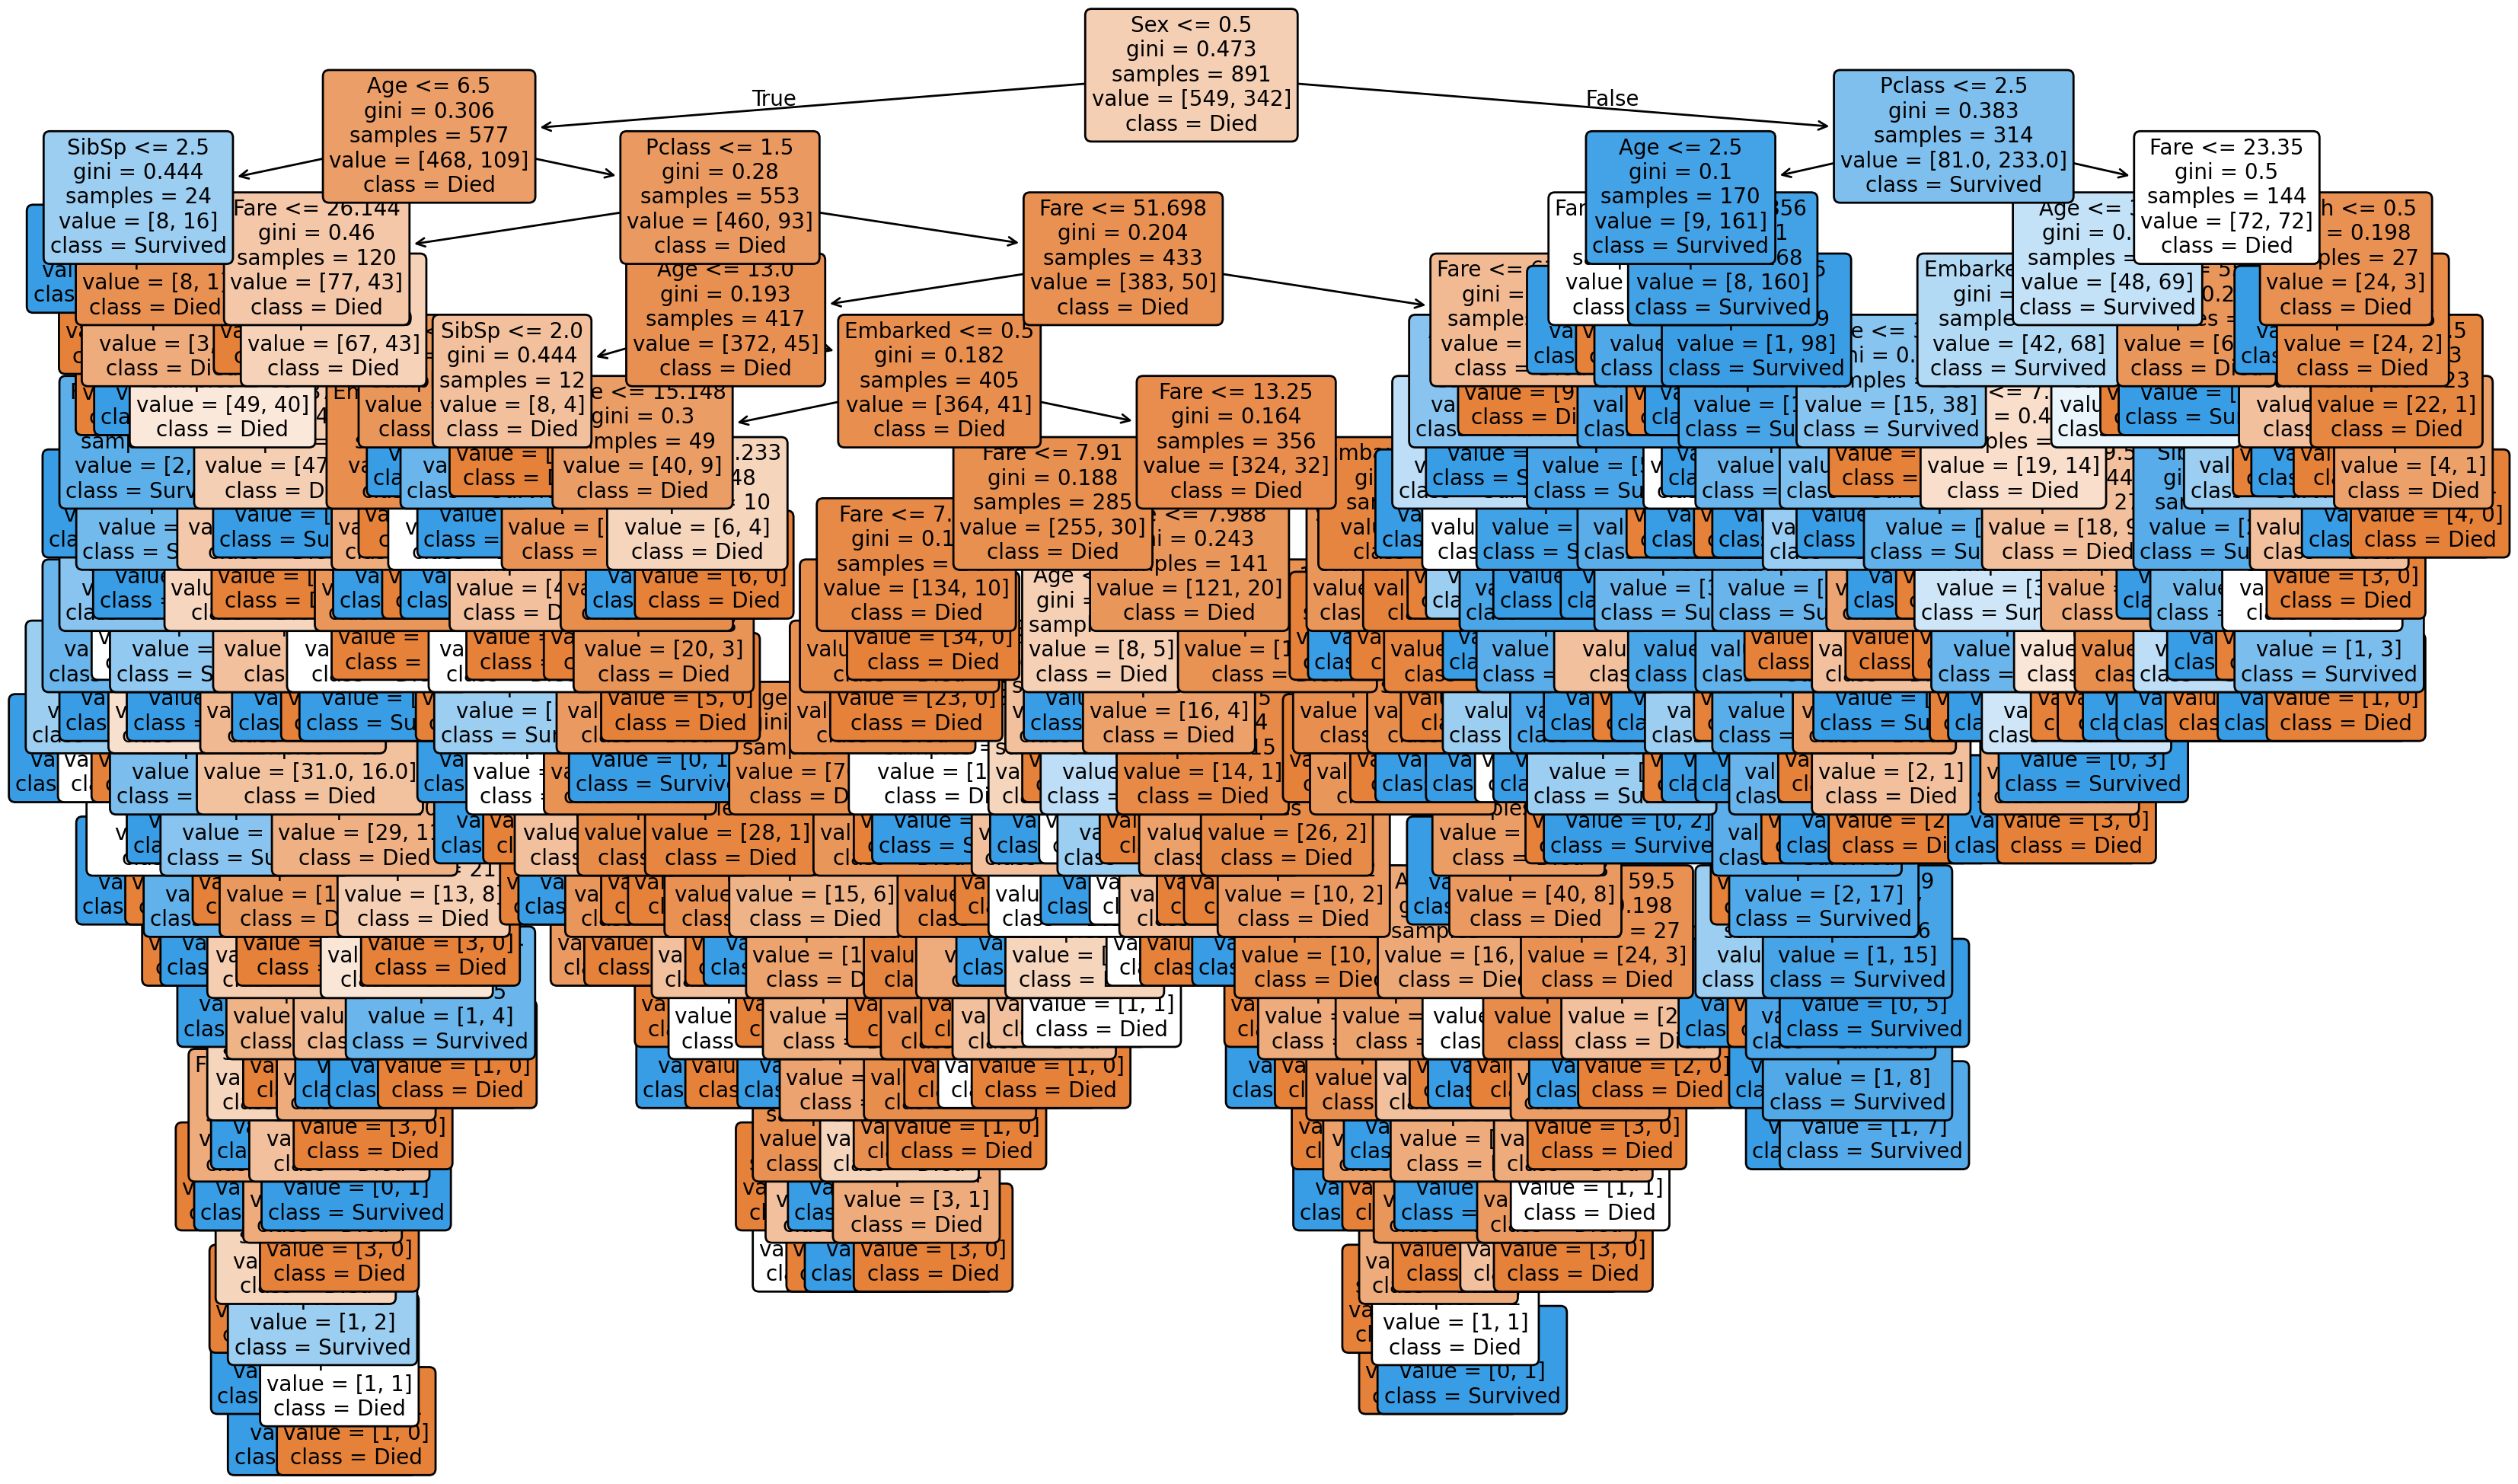

In [15]:
# ৬. ট্রেন করা মডেল ভিজ্যুয়ালাইজ করি
plt.figure(figsize=(20, 12), dpi=200)  # DPI বাড়ালে ছবির স্পষ্টতা বাড়বে
plot_tree(model, feature_names=features, class_names=["Died", "Survived"],
          filled=True, rounded=True, fontsize=10)  # ফন্ট বড় করি
plt.show()